In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [45]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content/drive/My Drive/Colab Notebooks/UniverseDacon
[Errno 2] No such file or directory: './drive/My Drive/Colab Notebooks/UniverseDacon/'
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [47]:
from collections import Counter
print(sorted(Counter(train['type_num']).items()))
type0 = train[train['type_num']==1]
type1 = train[train['type_num']==4]
type2 = train[train['type_num']==5]
type3 = train[train['type_num']==6]
type4 = train[train['type_num']==8]
type5 = train[train['type_num']==10]
type6 = train[train['type_num']==11]
type7 = train[train['type_num']==13]
type8 = train[train['type_num']==15]
type9 = train[train['type_num']==18]
type10 = train[train['type_num']==0]
type11 = train[train['type_num']==2]
type12 = train[train['type_num']==3]
type13 = train[train['type_num']==7]
type14 = train[train['type_num']==9]
type15 = train[train['type_num']==12]
type16 = train[train['type_num']==14]
type17 = train[train['type_num']==16]
type18 = train[train['type_num']==17]
unsam_train0 = type0.sample(5000)
unsam_train1 = type1.sample(5000)
unsam_train2 = type2.sample(5000)
unsam_train3 = type3.sample(5000)
unsam_train4 = type4.sample(5000)
unsam_train5 = type5.sample(5000)
unsam_train6 = type6.sample(5000)
unsam_train7 = type7.sample(5000)
unsam_train8 = type8.sample(5000)
unsam_train9 = type9.sample(5000)
type10, type
unsam_train = pd.concat([unsam_train0, unsam_train1, unsam_train2, unsam_train3, unsam_train4, unsam_train5, unsam_train6, unsam_train7, unsam_train8, unsam_train9, type10, type11, type12, type13, type14, type15, type16, type17, type18],axis=0)
print(sorted(Counter(unsam_train['type_num']).items()))


[(0, 2160), (1, 6506), (2, 500), (3, 2562), (4, 14618), (5, 13500), (6, 37347), (7, 4654), (8, 49680), (9, 127), (10, 13750), (11, 6580), (12, 13), (13, 7132), (14, 3257), (15, 14630), (16, 1154), (17, 61), (18, 21760)]
[(0, 2160), (1, 5000), (2, 500), (3, 2562), (4, 5000), (5, 5000), (6, 5000), (7, 4654), (8, 5000), (9, 127), (10, 5000), (11, 5000), (12, 13), (13, 5000), (14, 3257), (15, 5000), (16, 1154), (17, 61), (18, 5000)]


train 에서 type column 을 없애고 test 랑 합쳐서 .

IQR 방법으로 Outlier 제거.
일단 주석처리.

In [56]:
y_train = unsam_train['type_num']
train_wo_type = unsam_train.drop(columns=['type','type_num','fiberID'], axis=1)
test = test.drop(columns=['fiberID'])
total = pd.concat([train_wo_type, test])
#total.info()
print(unsam_train.info())

KeyError: ignored

In [0]:
# from collections import Counter
# def detect_outliers(df, n, features): 
#   outlier_indices = [] 
#   for col in features:
#     if col == 'type' or col == 'id':
#       continue; 
#     Q1 = np.percentile(df[col], 25) 
#     Q3 = np.percentile(df[col], 75) 
#     IQR = Q3 - Q1 

#     outlier_step =  IQR 
#     outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
#     outlier_indices.extend(outlier_list_col) 

#   outlier_indices = Counter(outlier_indices) 
#   multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
#   print()
#   return multiple_outliers 

# features = total.columns
# print(features)
# dup = detect_outliers(total, 2, features)

# print(len(dup))

# filter(lambda a: a < 199991, dup)
# print(len(dup))

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import minmax_scale
#Scaler = StandardScaler()
#Scaler = MinMaxScaler()
Scaler = RobustScaler()

total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']] = Scaler.fit_transform(total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']])
total.describe()
X_train = total.iloc[:64488]
test = total.iloc[64488:]
#X_train = total.iloc[:199991]
#test = total.iloc[199991:]
print(X_train.describe())
print(y_train.describe())


                  id      psfMag_u  ...    modelMag_i    modelMag_z
count   64488.000000  64488.000000  ...  64488.000000  64488.000000
mean   100227.533619     -0.360293  ...     -0.189205     -0.341739
std     57594.040493     50.178591  ...     26.014506     41.170389
min         3.000000  -7724.288612  ...  -5483.683341  -5955.843516
25%     50649.750000     -0.446428  ...     -0.581770     -0.491700
50%     99914.500000     -0.005341  ...     -0.003830     -0.004337
75%    150116.500000      0.585517  ...      0.406328      0.488701
max    199985.000000     44.476626  ...   1477.191676      7.623022

[8 rows x 21 columns]
count    64488.000000
mean         8.725065
std          5.153114
min          0.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         18.000000
Name: type_num, dtype: float64


In [59]:
test.describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,204995.000000,0.067115,0.061036,-0.009387,0.004839,0.122916,0.058402,0.057975,-0.016578,0.009476,0.120860,0.093254,-0.024472,-0.045634,0.007988,0.123825,0.078680,0.019328,-0.053319,-0.006039,0.098544
std,2889.493756,0.686736,0.982630,0.669364,0.679843,0.669030,0.692552,0.729794,0.679751,0.651772,0.690702,1.030315,5.191082,0.737481,0.723535,0.886306,0.715232,0.726380,0.689535,0.656349,0.684070
min,199991.000000,-9.115228,-23.815652,-3.982275,-16.350248,-1.947785,-4.044183,-4.599483,-2.882365,-2.541182,-10.887569,-43.541545,-508.138475,-16.032120,-9.896295,-30.999039,-2.641994,-2.176417,-2.115391,-2.039643,-2.057189
25%,202493.000000,-0.366017,-0.399917,-0.495888,-0.442071,-0.346237,-0.374351,-0.411320,-0.511109,-0.460450,-0.369731,-0.444760,-0.528954,-0.611974,-0.569567,-0.476168,-0.402233,-0.526232,-0.614383,-0.572373,-0.474835
50%,204995.000000,0.023864,0.073212,0.055111,0.068101,0.113612,0.008392,0.050259,0.035164,0.048279,0.069695,-0.033145,0.020462,0.029659,0.032865,0.034175,-0.028030,0.021709,0.028664,0.035197,0.030713
75%,207497.000000,0.448710,0.546493,0.464318,0.483159,0.618239,0.460069,0.571036,0.483703,0.507502,0.642626,0.492646,0.556529,0.488422,0.521754,0.648178,0.488771,0.556106,0.486732,0.523019,0.663663
max,209999.000000,5.495996,62.203799,4.926049,11.207424,6.540182,7.010385,10.650067,3.866568,4.821485,3.208394,16.489382,32.486866,8.470627,12.347416,21.164673,3.971119,3.462947,3.157215,2.897689,2.362525


In [60]:
from imblearn.over_sampling import SMOTE

X_train, y_train = SMOTE(random_state=0).fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

                  0         1         2   ...        18        19        20
0       43029.000000  0.109619 -0.400598  ... -0.696400 -0.912174 -0.953274
1      190202.000000 -0.133629 -0.704301  ... -0.969139 -1.157989 -1.177375
2       41958.000000  0.304810 -0.238296  ... -0.511775 -0.645894 -0.641988
3       95269.000000 -0.135281 -0.663225  ... -0.980589 -1.173618 -1.201559
4      105628.000000  0.322195 -0.182799  ... -0.452123 -0.585729 -0.586487
...              ...       ...       ...  ...       ...       ...       ...
94995    9284.489418  1.055632  0.889192  ...  0.023361  0.019016  0.045764
94996   98304.437094  0.050890 -0.494774  ... -0.556676 -0.464478 -0.341773
94997  175131.683359  1.077191  1.041773  ...  0.462520  0.001027 -0.192263
94998  137620.372320  0.930621  0.688404  ...  0.036211  0.089493  0.198569
94999   89617.220124 -0.793145 -0.750621  ... -0.735964 -0.854014 -0.860325

[95000 rows x 21 columns]
RangeIndex(start=0, stop=1, step=1)


Text(0.5, 1.0, 'type Values in the Training Set - train()')

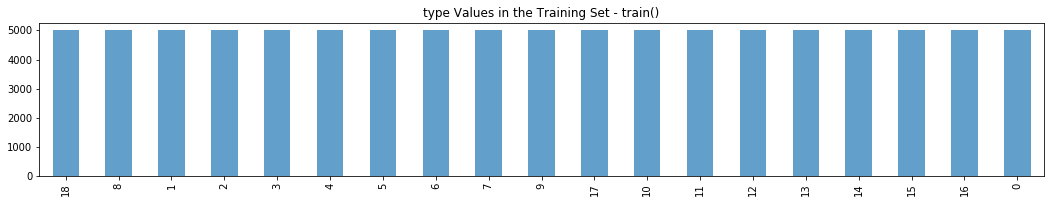

In [66]:
print(pd.DataFrame(X_train))
y_train = pd.DataFrame(y_train)
print(y_train.columns)
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
y_train[0].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [68]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000
mean,101063.593486,-0.114808,-0.287585,-0.279247,-0.288665,-0.088237,0.037910,-0.090730,0.110171,-0.196560,0.051611,0.044678,0.016433,0.098805,-0.063739,-0.123318,0.298275,-0.034482,-0.219144,-0.022234,-0.149033
std,57216.509597,42.990130,73.191991,56.268335,48.799939,37.595456,31.086273,47.193636,30.455076,43.424087,28.711134,38.349364,39.732689,23.363193,34.112416,39.808016,21.307458,61.575376,59.042087,24.349418,35.701554
min,3.000000,-7724.288612,-15286.846913,-10652.878550,-10503.641854,-7376.453678,-6287.742983,-7488.002403,-7525.859363,-8068.634558,-5403.224294,-6961.289156,-7151.531877,-4440.528196,-8510.256607,-6861.460673,-5736.156906,-13700.760879,-13540.517549,-5483.683341,-5955.843516
25%,52501.750000,-0.323391,-0.282595,-0.436709,-0.440719,-0.402957,-0.329459,-0.273798,-0.432225,-0.410219,-0.383300,-0.331103,-0.319239,-0.427890,-0.400901,-0.379150,-0.293489,-0.308330,-0.429084,-0.393323,-0.357556
50%,101667.500000,0.177104,0.145317,0.103043,0.147271,0.100560,0.177758,0.157640,0.108848,0.172902,0.120928,0.153563,0.181588,0.120256,0.167580,0.107749,0.193597,0.184360,0.121679,0.170285,0.123506
75%,150292.048793,0.838937,0.886858,0.597294,0.507471,0.563095,0.847723,0.884148,0.594672,0.526343,0.553049,0.863430,0.806603,0.563743,0.524924,0.547811,0.939320,0.811367,0.563721,0.533852,0.567034
max,199985.000000,44.476626,13.183191,13.782841,29.090272,3853.830263,88.029789,4.088361,4795.899135,9.151588,5169.577844,1015.756987,203.218780,2602.322623,567.576235,3222.971389,2679.159639,2901.550434,346.178372,1477.191676,7.623022


In [69]:
y_train.describe()


,0
count,95000.000000
mean,9.000000
std,5.477254
min,0.000000
25%,4.000000
50%,9.000000
75%,14.000000
max,18.000000


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=0)

In [76]:
%%time
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(max_depth = 7,n_esetimators=1000, n_jobs=-1, random_state=0)
XGB_clf.get_params()
XGB_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.205605	validation_1-merror:0.231579
[1]	validation_0-merror:0.194118	validation_1-merror:0.218842
[2]	validation_0-merror:0.186197	validation_1-merror:0.213789


KeyboardInterrupt: ignored

In [0]:
XGB_pred = XGB_clf.predict_proba(test)
submission = pd.DataFrame(data=XGB_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('XGBClassifier1.csv', index=True)
submission.describe()

In [13]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 19 columns):
STAR_WHITE_DWARF       10009 non-null float64
STAR_CATY_VAR          10009 non-null float64
STAR_BROWN_DWARF       10009 non-null float64
SERENDIPITY_RED        10009 non-null float64
REDDEN_STD             10009 non-null float64
STAR_BHB               10009 non-null float64
GALAXY                 10009 non-null float64
SERENDIPITY_DISTANT    10009 non-null float64
QSO                    10009 non-null float64
SKY                    10009 non-null float64
STAR_RED_DWARF         10009 non-null float64
ROSAT_D                10009 non-null float64
STAR_PN                10009 non-null float64
SERENDIPITY_FIRST      10009 non-null float64
STAR_CARBON            10009 non-null float64
SPECTROPHOTO_STD       10009 non-null float64
STAR_SUB_DWARF         10009 non-null float64
SERENDIPITY_MANUAL     10009 non-null float64
SERENDIPITY_BLUE       10009 non-null float64
dtypes: flo

In [14]:
pd.DataFrame(XGB_pred).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 19 columns):
0     10009 non-null float32
1     10009 non-null float32
2     10009 non-null float32
3     10009 non-null float32
4     10009 non-null float32
5     10009 non-null float32
6     10009 non-null float32
7     10009 non-null float32
8     10009 non-null float32
9     10009 non-null float32
10    10009 non-null float32
11    10009 non-null float32
12    10009 non-null float32
13    10009 non-null float32
14    10009 non-null float32
15    10009 non-null float32
16    10009 non-null float32
17    10009 non-null float32
18    10009 non-null float32
dtypes: float32(19)
memory usage: 743.0 KB
